### PCA para comprimir imágenes

In [1]:
#!pip install scikit-image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.decomposition import PCA


In [2]:
# Leer imagen (valores en [0,1])
roo = imread("roo.jpg")[:, :, 1]

print(roo.shape)

(534, 800)


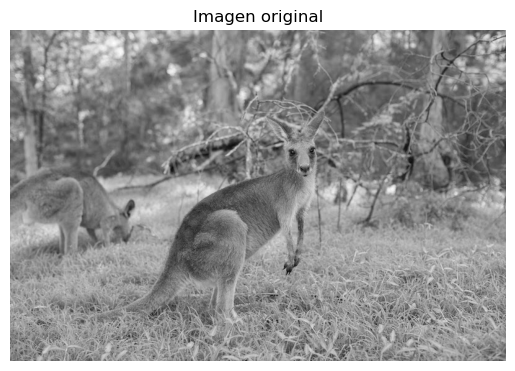

In [3]:
plt.figure()
plt.imshow(roo, cmap='gray')
plt.axis('off')
plt.title("Imagen original")
plt.show()


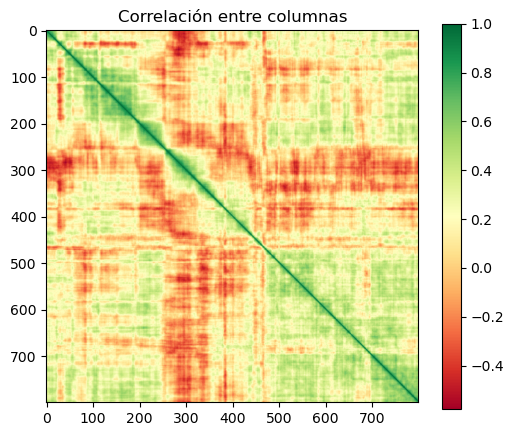

In [4]:
corr = np.corrcoef(roo, rowvar=False)

plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='RdYlGn')
plt.colorbar()
plt.title("Correlación entre columnas")
plt.show()

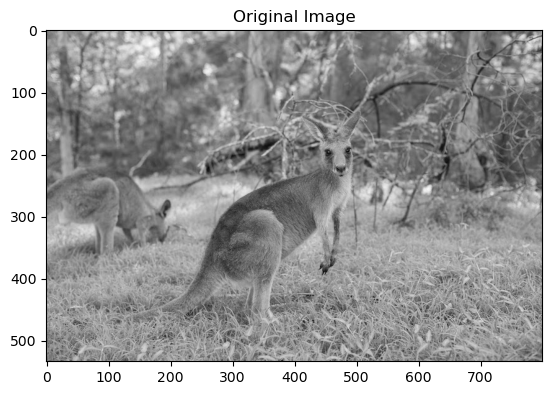

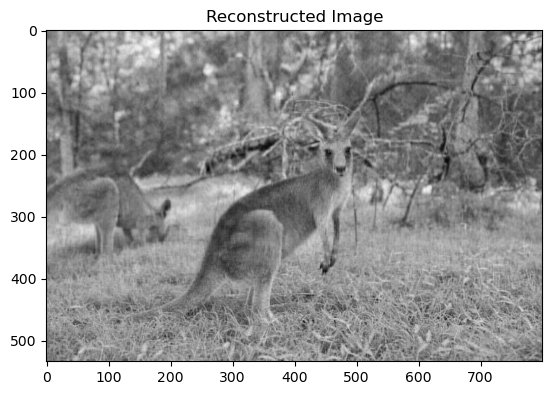

In [5]:
import numpy as np
from matplotlib import pyplot as plt

# Cargar imagen
roo = imread("roo.jpg")[:, :, 1]
image = roo

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Calcular matriz de covarianza
mean = np.mean(image)

normalized_image = image - mean
normalized_image_reshaped = normalized_image.reshape(image.shape)

cov_matrix = np.cov(normalized_image_reshaped, rowvar=False)

# print("Covariance Matrix:\n", cov_matrix)

# Encontrar los Eigenvalues y Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# print("Eigenvalues:\n", eigenvalues)
# print("\nEigenvectors:\n", eigenvectors)

# Ordenar los valores de los eigenvectores y seleccionar las componentes principales
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

k = 100 # cambiar valor
top_k_eigenvectors = sorted_eigenvectors[:, :k]

# print("Top k Eigenvectors:\n", top_k_eigenvectors)

# Reconstruir la imagen
projected_image = np.dot(normalized_image_reshaped, top_k_eigenvectors)
reconstructed_image = np.dot(projected_image, top_k_eigenvectors.T) + mean
reconstructed_image = reconstructed_image.reshape(image.shape)

plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.show()